# Analysis for the learning of the 2D dynamics with streamfunction wind and the attack angle (alpha) as only state

Streamfunction shape:

$$
W_x = k \cdot rk_y \bigg (1+\epsilon \sin \big(\frac{\pi \cdot rk_x}{L_x} \big )\cos \big(\frac{\pi \cdot rk_y}{L_y} \big)\frac{\pi}{L_y} \bigg) \\
W_y = -k\cdot rk_y\frac{rk_y}{2}\epsilon \sin \big( \frac{\pi \cdot rk_y}{L_y} \big)\cos \big( \frac{\pi \cdot rk_x}{L_x} \big)
$$

with:
$$
L_x = 50\\
L_y = 50\\
k = 0.5
$$

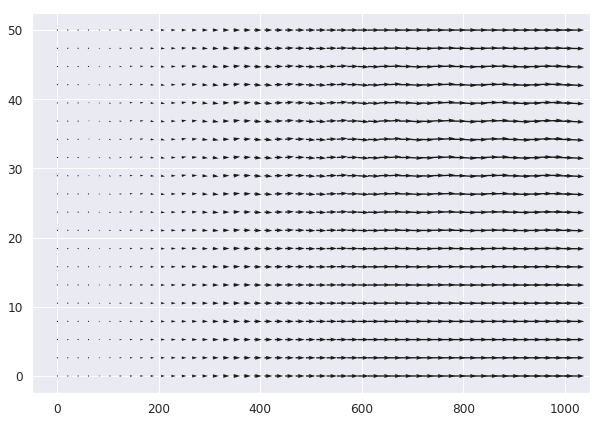

In [137]:
nx = 50
ny = 20

x,y = np.meshgrid(np.linspace(0,1000,nx),np.linspace(0,50,ny))

u = k*x*(1+epsilon*np.sin(np.pi*x/Lx)*np.cos(np.pi*y/Ly)*np.pi/Ly);
v = -(k*y*y/2*epsilon*np.sin(np.pi*y/Ly)*np.cos(np.pi*x/Lx));

plt.quiver(x,y,u,v)
plt.show()

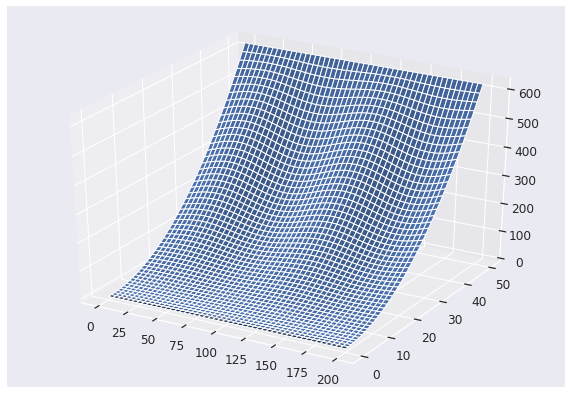

In [126]:
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib.cm as cm 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

n = 50
x = np.linspace(0,200,n) 
y = np.linspace(0,50,n) 
X, Y = np.meshgrid(x, y) 

Z = k*Y**2/2*(1+epsilon*np.sin(np.pi*X/Lx)*np.sin(np.pi*Y/Ly))
#print(Z[0])

ax.plot_surface(X, Y, Z)
#plt.pcolormesh(X, Y, Z, cmap = cm.gray) 
plt.show()

## Streamfunction plot

In [106]:
def f(x,y):
    k*y**2/2*(1+epsilon*np.sin(np.pi*x/Lx)*np.sin(np.pi*y/Ly))

epsilon=0.1
k=0.5
Lx=50
Ly=50

x = np.arange(0,200,0.5)
y = np.arange(0,50,0.5/4)
#print(x)
#plt.plot(x, f(x, y))

#set cntrparam levels 50
#set yrange[0:50]
#set xrange[0:200]
#set view map
#set contour
#unset surface
#splot f(x,y)

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import numpy as np
import pandas as pd
plt.rcParams["figure.figsize"] = (10,7)

alphas = [-8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 19, 20]
n_alphas = len(alphas)
n_actions = 3

fs = 15
title_fs = 17
label_fs = 13
legend_fs = 11

## 1) Q matrix

In [2]:
cQ = pd.read_csv("cQ_matrix_streamfunction.txt")
pQ = pd.read_csv("pQ_matrix_streamfunction.txt")

pQ.head(4)

,episode,alpha_idx,action_0,action_1,action_2
0,0,0,0.000000,238.462404,239.000047
1,0,1,239.000094,239.000000,239.000015
2,0,2,239.000058,239.000000,239.000000
3,0,3,239.000042,239.000000,239.000000


In [3]:
# check
if (pQ['episode'].max() != cQ['episode'].max() ):
    print("ERROR! maximum number of episodes is not the same")
    
ep_max = pQ['episode'].max()
    
# controllo se gli elementi per alpha = 20 all'ultimo episodio sono uguali (non dovrebbero esserlo)
(cQ.loc[((cQ['episode'] == ep_max) & (cQ['alpha_idx'] == 15))] == pQ.loc[((pQ['episode'] == ep_max) & (pQ['alpha_idx'] == 15))]).all()

episode       True
alpha_idx     True
action_0     False
action_1     False
action_2      True
dtype: bool

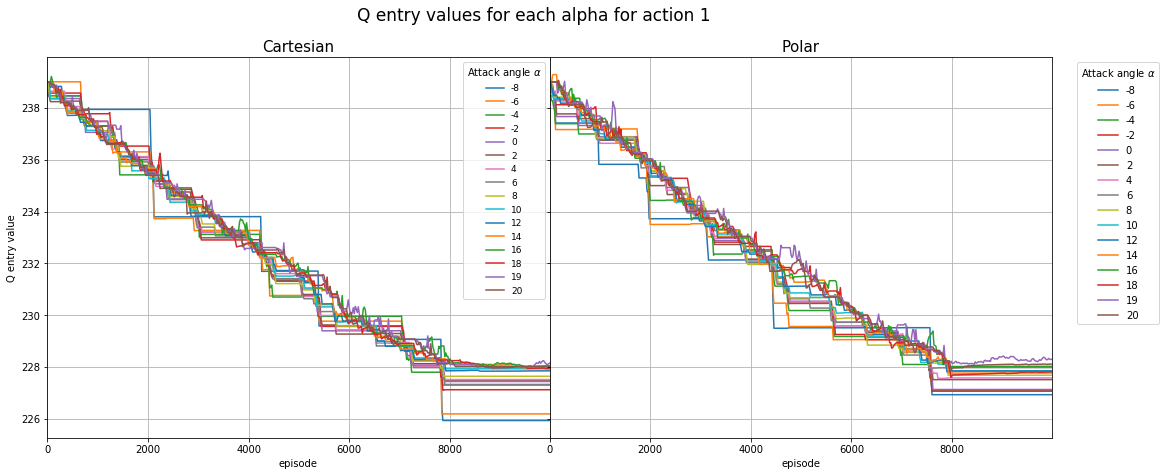

In [4]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(18, 7), gridspec_kw={'wspace': 0})

chosen_action = 1

for alph, val in enumerate(alphas):
    if (alphas[alph] != 100):
    
        fig.suptitle("Q entry values for each alpha for action " + str(chosen_action), fontsize = title_fs)

        df = cQ.loc[cQ['alpha_idx'] == alph]
        axs[0].plot(df['episode'], df['action_'+str(chosen_action)], label = str(alphas[alph]))
        axs[0].grid(b=True)

        df = pQ.loc[pQ['alpha_idx'] == alph]
        axs[1].plot(df['episode'], df['action_'+str(chosen_action)],  label = str(alphas[alph]))
        axs[1].grid(b=True)

        plt.legend(title = 'Attack angle ' + r'$\alpha$', bbox_to_anchor=(1.04,1), loc="upper left")
        axs[0].legend(title = 'Attack angle ' + r'$\alpha$', fontsize = legend_fs, loc='upper right', prop={"size":9})

        axs[0].set_ylabel('Q entry value')
        axs[0].set_xlim(0,ep_max)

        axs[0].set_title("Cartesian", fontsize = fs)
        axs[1].set_title("Polar", fontsize = fs)
    
for ax in axs.flat:
    ax.set(xlabel='episode')
    

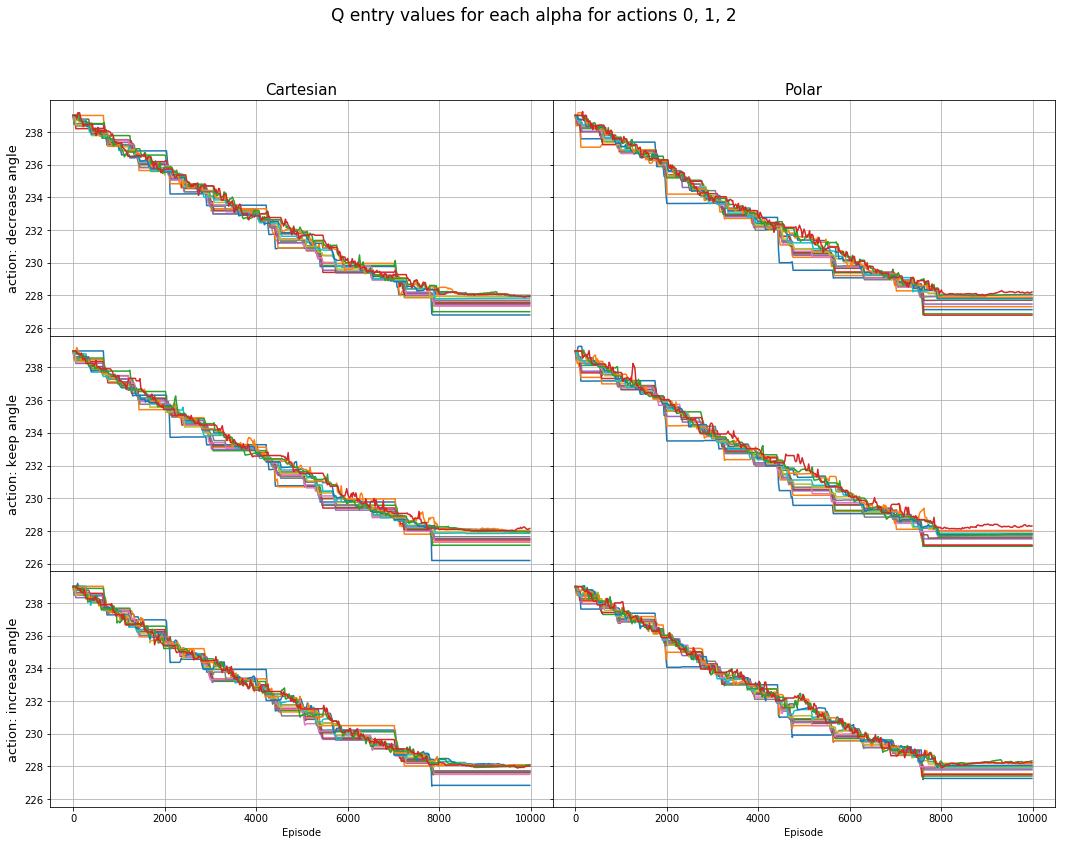

In [5]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(18, 13), gridspec_kw={'wspace': 0, 'hspace':0})
(ax1, ax2), (ax3, ax4), (ax5, ax6) = axs
ep_max = cQ['episode'].max()

actions = ['action_0', 'action_1', 'action_2']

fig.suptitle("Q entry values for each alpha for actions 0, 1, 2 ", fontsize = title_fs)

for alph in range(1,15):
    
    df = cQ.loc[cQ['alpha_idx'] == alph]

    ax1.plot(df['episode'], df['action_0'], label = str(alphas[alph]))
    ax3.plot(df['episode'], df['action_1'], label = str(alphas[alph]))
    ax5.plot(df['episode'], df['action_2'], label = str(alphas[alph]))
    
    ax1.set_ylabel('action: decrease angle', fontsize = label_fs)
    ax3.set_ylabel('action: keep angle', fontsize = label_fs)
    ax5.set_ylabel('action: increase angle', fontsize = label_fs)

    df = pQ.loc[pQ['alpha_idx'] == alph]
    
    ax2.plot(df['episode'], df['action_0'], label = str(alphas[alph]))
    ax4.plot(df['episode'], df['action_1'], label = str(alphas[alph]))
    ax6.plot(df['episode'], df['action_2'], label = str(alphas[alph]))

ax1.set_title("Cartesian", fontsize = fs)
ax2.set_title("Polar", fontsize = fs)
    
for ax in axs.flat:
    ax.set(xlabel='Episode')
    
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()

## 2) Rewards

In [6]:
crew = pd.read_csv("crewards_streamfunction.txt")
prew = pd.read_csv("prewards_streamfunction.txt")

crew.head(2)

,episode,epsilon,Alpha,steps,return
0,0,0.9,0.001,198020,1.825644
1,1,0.9,0.001,817497,0.986377


In [7]:
# check if the learning phases were identical
c_eplength = crew['steps'].max()
p_eplength = crew['steps'].max()

if ((crew['Alpha'].astype(float) == prew['Alpha'].astype(float)).all() == False \
    or (crew['epsilon'].astype(float) == prew['epsilon'].astype(float)).all() == False \
    or c_eplength != p_eplength):
    print("ERROR!!!")

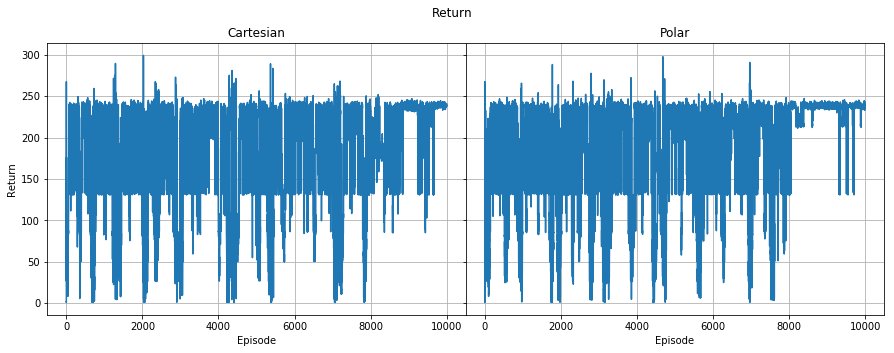

In [8]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0})

fig.suptitle("Return")

axs[0].plot(crew['episode'], crew['return'])
axs[0].grid(b=True)

axs[1].plot(prew['episode'], prew['return'])
axs[1].grid(b=True)

#axs[0].legend(title = , fontsize = legend_fs, loc='upper left', prop={"size":9})
axs[0].set_ylabel('Return')

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

for ax in axs.flat:
    ax.set(xlabel='Episode')

## Mean growth of returns

In [9]:
num_blocks = 40
data_per_block = int(len(crew)/num_blocks)

cmean = []
pmean = []
for i in range(0,num_blocks):
    #print(i*n_data,i*n_data+n_data)
    cmean.append(np.mean(crew['return'][i*data_per_block:i*data_per_block+data_per_block]))
    pmean.append(np.mean(prew['return'][i*data_per_block:i*data_per_block+data_per_block]))

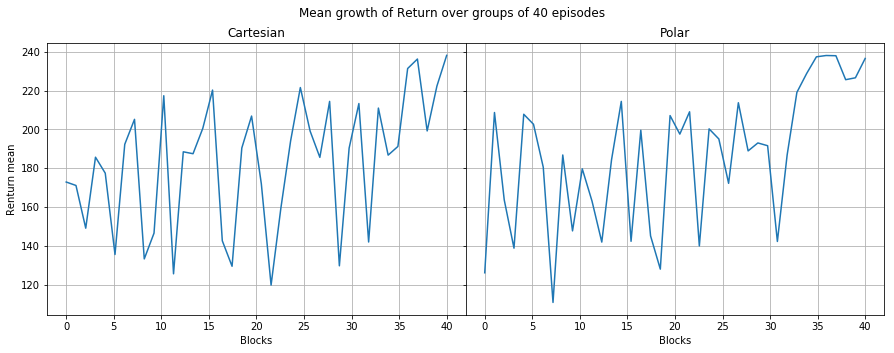

In [10]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0})

fig.suptitle('Mean growth of Return over groups of ' + str(num_blocks) + ' episodes')

axs[0].plot(np.linspace(0, num_blocks, num_blocks), cmean)
axs[0].grid(b=True)

axs[1].plot(np.linspace(0, num_blocks, num_blocks), pmean)
axs[1].grid(b=True)

axs[0].set_ylabel('Renturn mean')

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

for ax in axs.flat:
    ax.set(xlabel='Blocks')

## 3) Last iteration Policy

In [11]:
cpol = pd.read_csv("cpolicy_streamfunction.txt")
ppol = pd.read_csv("ppolicy_streamfunction.txt")

cpol.head(3)

,step,alpha,action,reward,Q[s+0],Q[s+1],Q[s+2]
0,0,12.0,2,0.000000,227.831325,227.852289,228.013859
1,1000,14.0,2,0.006712,228.001672,227.980685,228.055746
2,2000,16.0,2,0.011738,227.976449,228.021720,228.096273


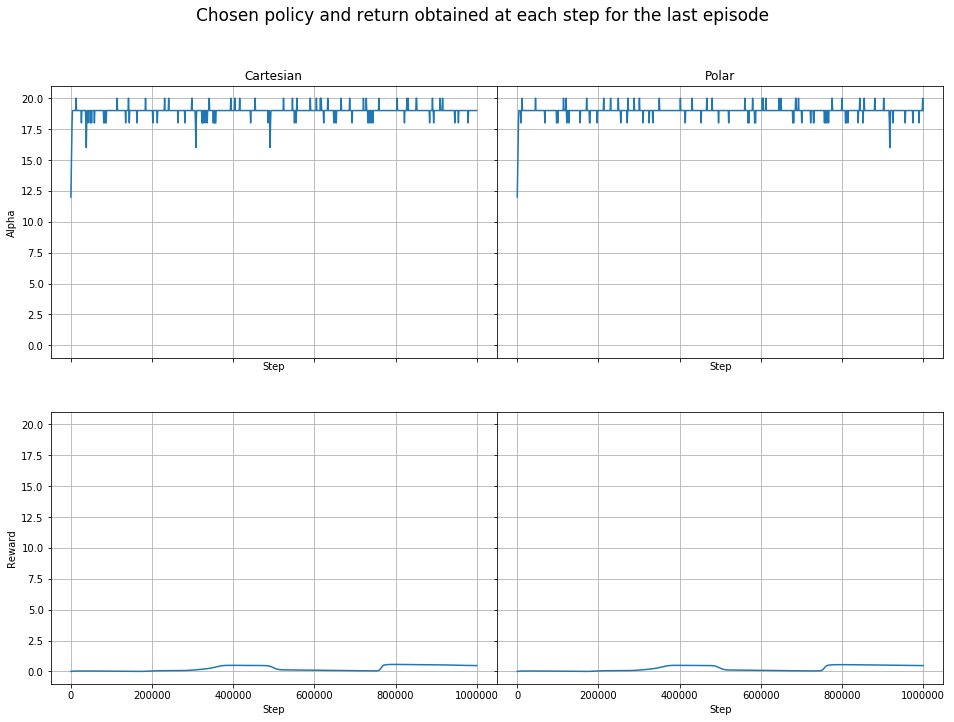

In [12]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16, 11), gridspec_kw={'wspace': 0})
(ax1, ax2), (ax3, ax4) = axs

fig.suptitle("Chosen policy and return obtained at each step for the last episode", fontsize = title_fs)

ax1.plot(cpol['step'], cpol['alpha'])
ax2.plot(ppol['step'], ppol['alpha'])

ax3.plot(cpol['step'], cpol['reward'])
ax4.plot(ppol['step'], ppol['reward'])

ax1.set_ylabel('Alpha')
ax3.set_ylabel('Reward')

ax1.set_title("Cartesian")
ax2.set_title("Polar")

for ax in axs.flat:
    ax.set(xlabel='Step')
    
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

## 4) last episode dynamics plot

In [15]:
cout = pd.read_csv("cout_streamfunction.txt")
pout = pd.read_csv("pout_streamfunction.txt")

cout.head(3)

,t,x_kite,z_kite,x_block,z_block,theta,vtheta,windx,windy,v_block,Tension
0,0,50.000000,0.001000,0.000000,0.0,0.000010,0.999911,0.000500,0.000000,0.000020,-30826.148149
1,1000,50.001212,0.476992,0.003487,0.0,0.009531,0.898593,0.238496,0.000170,0.668300,-28246.896725
2,2000,50.004683,0.903488,0.012847,0.0,0.018063,0.789351,0.451743,0.001158,1.176762,29417.768441


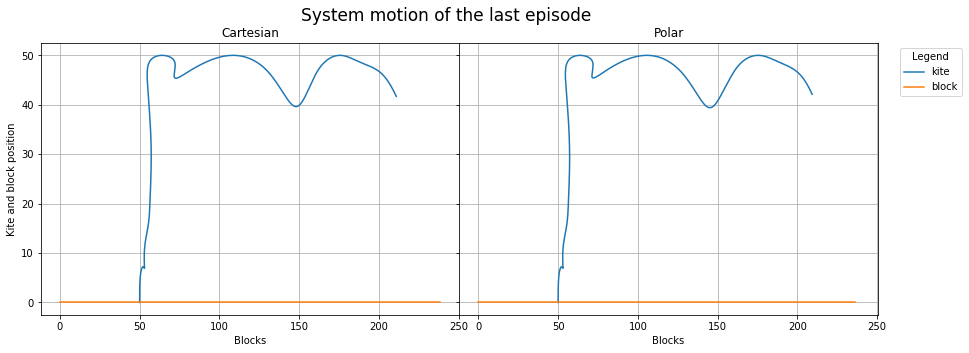

In [16]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0})

fig.suptitle('System motion of the last episode', fontsize = title_fs)

axs[0].plot(cout['x_kite'], cout['z_kite'],label='kite')
axs[0].plot(cout['x_block'], cout['z_block'],label='block')
axs[0].grid(b=True)

axs[1].plot(pout['x_kite'], pout['z_kite'],label='kite')
axs[1].plot(pout['x_block'], pout['z_block'],label='block')
axs[1].grid(b=True)

plt.legend(title = 'Legend', bbox_to_anchor=(1.04,1), loc="upper left")
        
axs[0].set_ylabel('Kite and block position')

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

for ax in axs.flat:
    ax.set(xlabel='Blocks')

## 5) Q matrix counter

In [88]:
cQ_count = pd.read_csv("cQ_counter_streamfunction.txt")
pQ_count = pd.read_csv("pQ_counter_streamfunction.txt")

pQ_count.head(5)

,episode,alpha_idx,action_0,action_1,action_2
0,9999,0,0,5400,6340
1,9999,1,6384,7290,22499
2,9999,2,22619,20384,109615
3,9999,3,109918,163577,76564
4,9999,4,77254,59344,61719


2445701


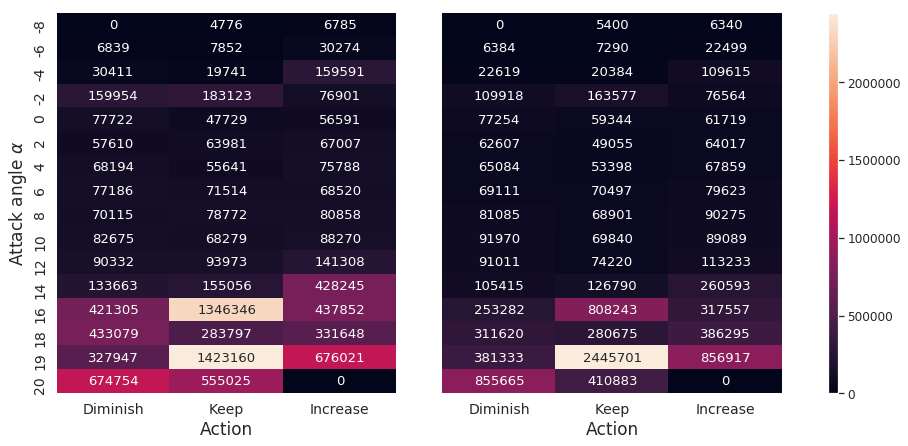

In [87]:
df1 = cQ_count[['action_0','action_1', 'action_2']]
df2 = pQ_count[['action_0','action_1', 'action_2']]

vmin = 0
vmax = max(df1['action_0'].max(), df2['action_0'].max(),
          df1['action_1'].max(), df2['action_1'].max(),
          df1['action_2'].max(), df2['action_2'].max())
print(vmax)

fig, axs = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[7,7,0.2]),figsize=(14, 7))
sns.set(font_scale=1.1)
sns.heatmap(df1, annot=True, fmt="d", cbar=False, ax=axs[0], vmin=vmin)
sns.heatmap(df2, annot=True, fmt="d", yticklabels=False, cbar=False, ax=axs[1], vmax=vmax)
axs[0].set_yticklabels(alphas)
axs[0].set_ylabel(r'Attack angle $\alpha$',fontsize=17)
axs[0].set_xlabel("Action",fontsize=17)
axs[1].set_xlabel("Action",fontsize=17)
axs[0].set_xticklabels(["Diminish", "Keep", "Increase"])
axs[1].set_xticklabels(["Diminish", "Keep", "Increase"])
axs[0].tick_params(labelsize=14)
axs[1].tick_params(labelsize=14)

fig.colorbar(axs[1].collections[0], cax=axs[2])

plt.show()